## Extract the Data

## Source
U.S. Bureau of Labor Statistics, Consumer Price Index for All Urban Consumers: All Items Less Food and Energy in U.S. City Average [CPILFESL], retrieved from FRED, Federal Reserve Bank of St. Louis; https://fred.stlouisfed.org/series/CPILFESL, December 20, 2023.

In [144]:
# Importing pandas library
import pandas as pd

# Load the CPI data
cpi_file_path = 'Resources/CPILFESL.csv' 
cpi_df = pd.read_csv(cpi_file_path)

# Exploring the top 5 columns
cpi_df.head()


,DATE,CPILFESL
0,1971-08-01,43.0
1,1971-09-01,43.0
2,1971-10-01,43.1
3,1971-11-01,43.2
4,1971-12-01,43.3


In [145]:
# Undertsnading the structure of the data and datatypes
cpi_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 628 entries, 0 to 627
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   DATE      628 non-null    object 
 1   CPILFESL  628 non-null    float64
dtypes: float64(1), object(1)
memory usage: 9.9+ KB


In [146]:
# Converting the DATE column to a datetime format
cpi_df['DATE'] = pd.to_datetime(cpi_df['DATE'])

# Validating the conversion
cpi_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 628 entries, 0 to 627
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   DATE      628 non-null    datetime64[ns]
 1   CPILFESL  628 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 9.9 KB


In [147]:
# Resampling the data to get annual averages
annual_cpi_df = cpi_df.resample('Y', on='DATE').mean()

# Resetting the index to get 'DATE' as a column
annual_cpi_df.reset_index(inplace=True)

# Calculating Year-over-Year Inflation Rates
annual_cpi_df['Inflation Rate'] = annual_cpi_df['CPILFESL'].pct_change() * 100

# Displaying the first few rows to verify the changes
print(annual_cpi_df.head())

        DATE   CPILFESL  Inflation Rate
0 1971-12-31  43.120000             NaN
1 1972-12-31  44.041667        2.137446
2 1973-12-31  45.575000        3.481552
3 1974-12-31  49.358333        8.301335
4 1975-12-31  53.908333        9.218302


## Visualize the Data

<Axes: title={'center': 'Consumer Price Index for All Urban Consumers'}, xlabel='DATE'>

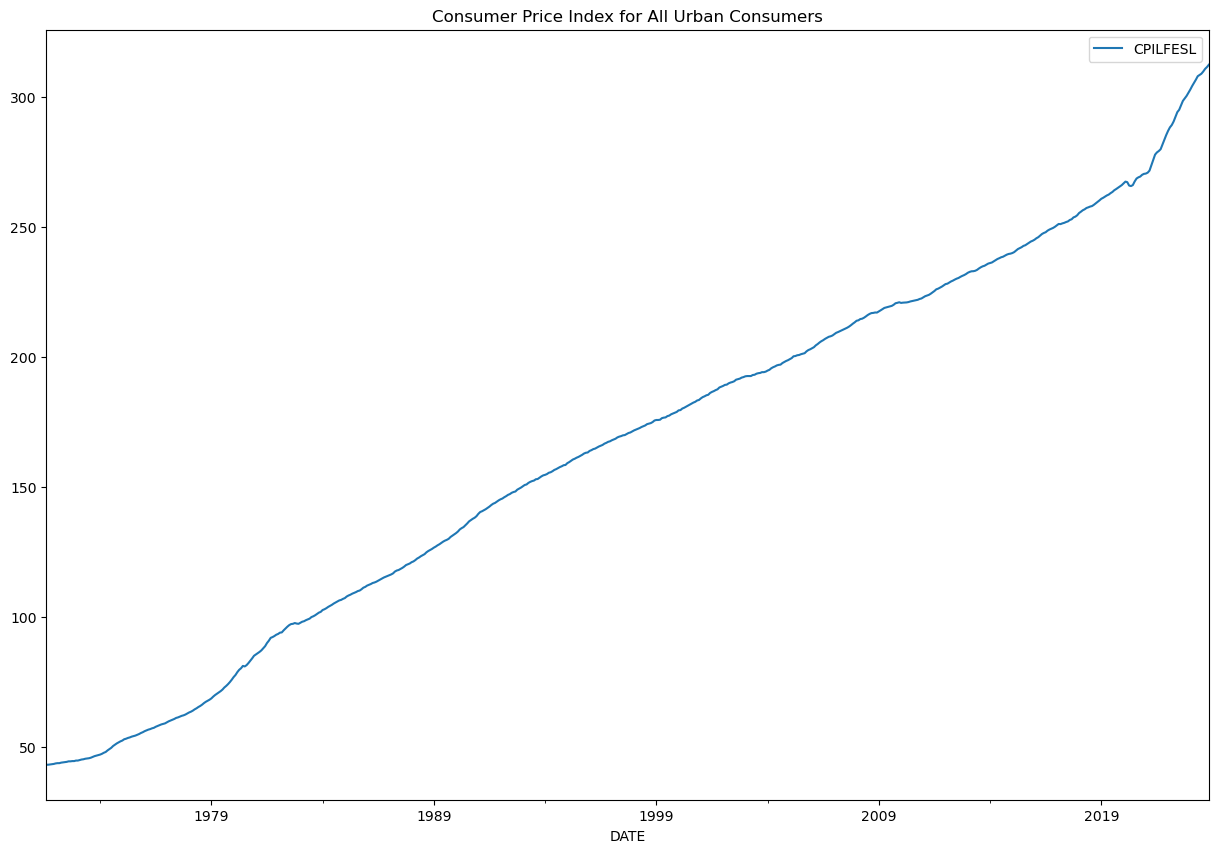

In [148]:
# Plotting the CPI data
cpi_df.plot(x='DATE', y='CPILFESL', title='Consumer Price Index for All Urban Consumers', figsize=(15,10))

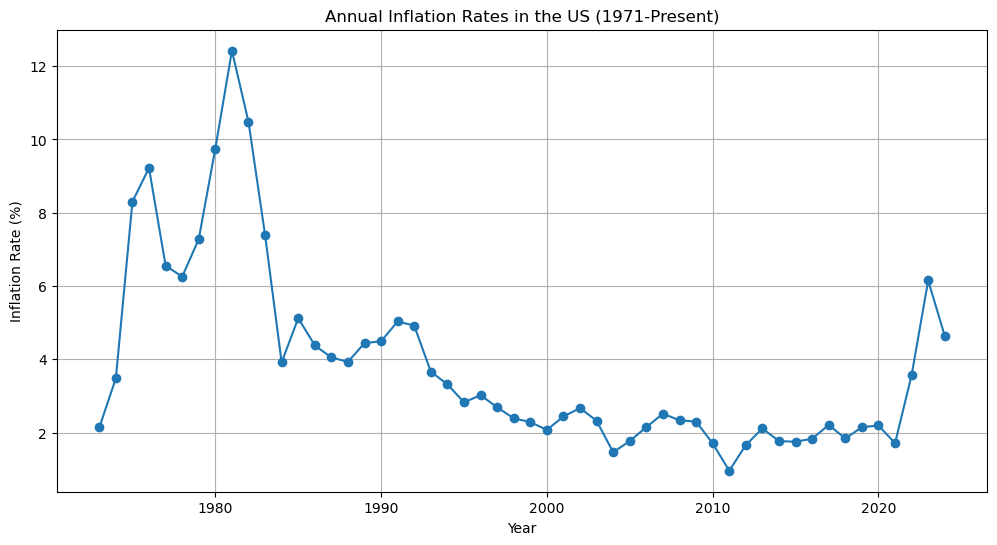

In [149]:
# Importing matplotlib for visualization
import matplotlib.pyplot as plt

# Plotting the inflation rates over the years
plt.figure(figsize=(12, 6))
plt.plot(annual_cpi_df['DATE'], annual_cpi_df['Inflation Rate'], marker='o')
plt.title('Annual Inflation Rates in the US (1971-Present)')
plt.xlabel('Year')
plt.ylabel('Inflation Rate (%)')
plt.grid(True)
plt.show()


In [150]:
# Identify years with exceptionally high or low inflation rates
high_inflation_years = annual_cpi_df[annual_cpi_df['Inflation Rate'] > annual_cpi_df['Inflation Rate'].quantile(0.9)]
low_inflation_years = annual_cpi_df[annual_cpi_df['Inflation Rate'] < annual_cpi_df['Inflation Rate'].quantile(0.1)]

print("High Inflation Years:\n", high_inflation_years)
print("\nLow Inflation Years:\n", low_inflation_years)


High Inflation Years:
          DATE   CPILFESL  Inflation Rate
3  1974-12-31  49.358333        8.301335
4  1975-12-31  53.908333        9.218302
8  1979-12-31  71.858333        9.749268
9  1980-12-31  80.783333       12.420271
10 1981-12-31  89.250000       10.480710
11 1982-12-31  95.850000        7.394958

Low Inflation Years:
          DATE    CPILFESL  Inflation Rate
32 2003-12-31  193.225000        1.461515
38 2009-12-31  219.236667        1.703237
39 2010-12-31  221.335833        0.957489
40 2011-12-31  225.006417        1.658377
43 2014-12-31  237.902333        1.750100
49 2020-12-31  267.704917        1.708696


In [151]:
import plotly.express as px

# Creating an interactive line plot
fig = px.line(annual_cpi_df, x='DATE', y='Inflation Rate', title='Annual Inflation Rates in the US (1971-Present)')
fig.show()


## Cleanse the Data for Prophet

In [152]:
#!pip install prophet


In [153]:
from prophet import Prophet



In [154]:
# Preparing inflation data for Prophet
prophet_inflation_df = annual_cpi_df[['DATE', 'Inflation Rate']].rename(columns={'DATE': 'ds', 'Inflation Rate': 'y'})



In [155]:
# Preparing the CPI data for Prophet
cpi_prophet_df = cpi_df.rename(columns={'DATE': 'ds', 'CPILFESL': 'y'})
cpi_prophet_df['ds'] = pd.to_datetime(cpi_prophet_df['ds'])


## CPI Visualizations and Predictions with Prophet

In [156]:
# Initialize the Prophet model
cpi_model = Prophet()

# Fit the model with your dataframe
cpi_model.fit(cpi_prophet_df)


10:52:06 - cmdstanpy - INFO - Chain [1] start processing


10:52:06 - cmdstanpy - INFO - Chain [1] done processing


In [157]:
# Create a dataframe for future predictions for the next 5 years
cpi_future = cpi_model.make_future_dataframe(periods=5 * 12, freq='M')

# Use the model to make predictions
cpi_forecast = cpi_model.predict(cpi_future)


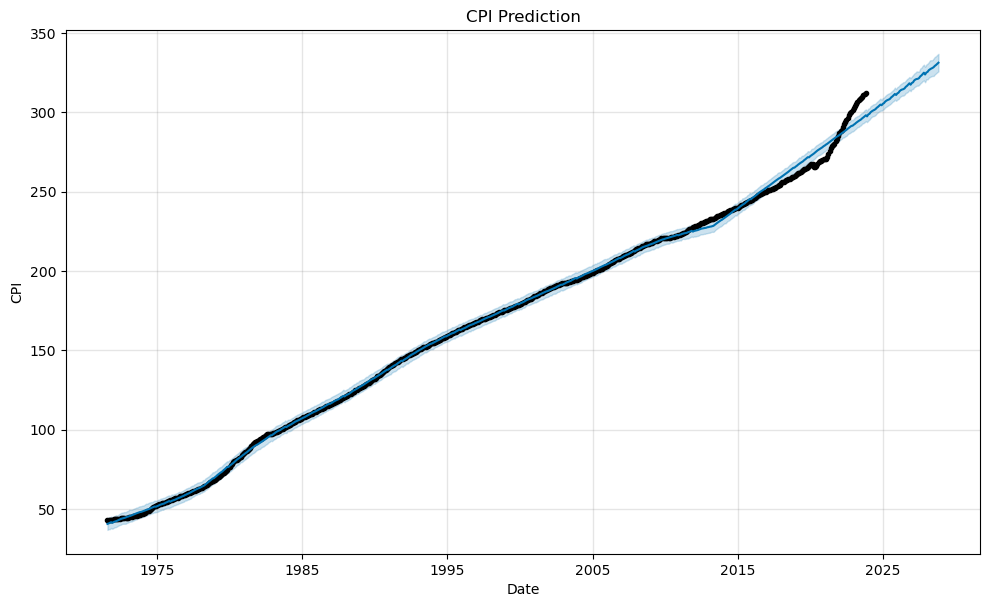

In [158]:
# Plot the forecast
cpi_model.plot(cpi_forecast, xlabel = 'Date', ylabel = 'CPI')
plt.title('CPI Prediction')
plt.show()


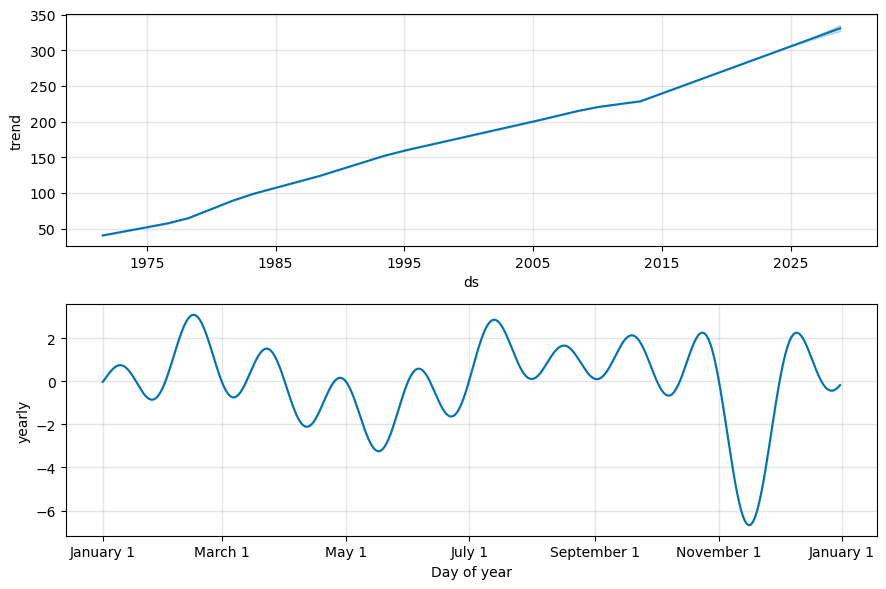

In [159]:
# Optionally, plot the forecast components
cpi_model.plot_components(cpi_forecast)
plt.show()

## Inflation Visualizations and Predictions with Prophet

In [160]:
# Initializing and fitting the model
inflation_model = Prophet(yearly_seasonality=True)
inflation_model.fit(prophet_inflation_df)

#Predicting the next 5 years of inflation rates
inflation_future = inflation_model.make_future_dataframe(periods=5, freq='Y')
inflation_forecast = inflation_model.predict(inflation_future)

10:52:07 - cmdstanpy - INFO - Chain [1] start processing
10:52:07 - cmdstanpy - INFO - Chain [1] done processing


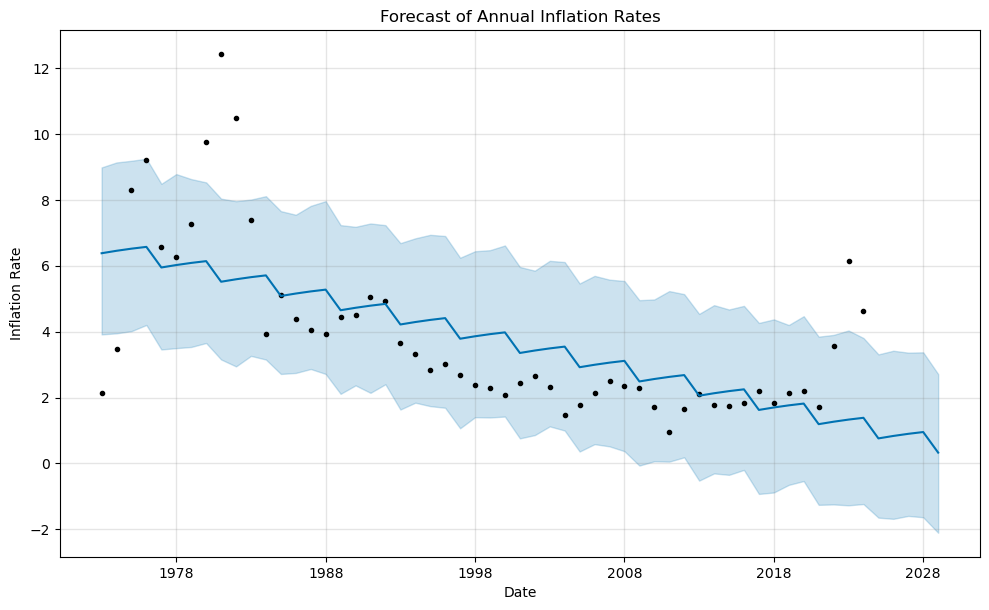

In [161]:
# Plotting the forecast
fig = inflation_model.plot(inflation_forecast, xlabel = 'Date', ylabel = 'Inflation Rate')
plt.title('Forecast of Annual Inflation Rates')
plt.show()

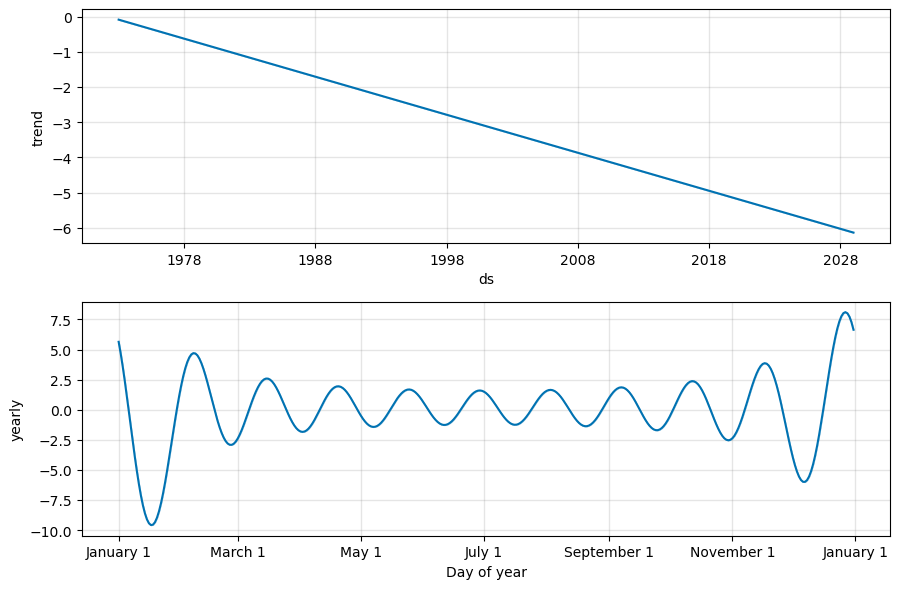

In [162]:
# Optionally, plot the forecast components
inflation_model.plot_components(inflation_forecast)
plt.show()

## Extract the Cleansed Data into a CSV

In [163]:
# Save the inflation forecast data to a CSV file
inflation_forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].to_csv('Resources/inflation_forecast.csv', index=False)


In [164]:
# Saving the cpi forecast data to a CSV file
cpi_forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].to_csv('Resources/cpi_forecast.csv', index=False)

In [165]:
#Saving the cpi data to a CSV file
cpi_df.to_csv('Resources/cpi_modified.csv', index=False)

# Conclusions


1. **CPI Growth Trend**:
   - The Consumer Price Index has shown a consistent upward trend over the past several decades. This suggests a general increase in the price level of consumer goods and services over time, which is a typical characteristic of an economy experiencing inflation.

2. **Inflation Rate Fluctuations**:
   - Despite the steady rise in CPI, the inflation rate has experienced periods of fluctuation. High inflation rates in the early 1980s and more stable, lower rates in the following years suggest varying economic conditions and the impact of monetary policies.

3. **Forecast Insights**:
   - Forecasting models indicate that while the CPI is expected to continue to rise, the rate of this increase (inflation rate) may not be as steep as in past decades. This could reflect a maturing economy or effective inflation control measures.

4. **Economic Indicators Relationship**:
   - If other economic indicators were analyzed alongside CPI and inflation data, correlations might reveal how inflation interacts with economic growth, employment rates, and monetary policy.

5. **Predictive Confidence**:
   - The predictive bands in the forecast charts highlight the uncertainty in future projections. This emphasizes the need for periodic model updates with new data to refine future forecasts.

6. **Seasonal Patterns**:
   - Any seasonal patterns observed in the CPI could inform businesses and policymakers about regular fluctuations in consumer prices, which could be tied to factors like holidays, tax cycles, or agricultural production cycles.

7. **Long-Term Economic Planning**:
   - The insights from CPI and inflation trend analyses are vital for long-term economic planning, affecting decisions on interest rates, wage negotiations, and retirement planning.

8. **Purchasing Power Impact**:
   - The gradual increase in CPI without a corresponding increase in wages would indicate a decrease in purchasing power for consumers, which could have broader implications for economic wellbeing.
